```json
{
     "_id" : ObjectId("5b107bec1d2952d0da904dd7"),
     "title" : "Titan A.E.",
     "year" : 2000,
     "rated" : "PG",
     "runtime" : 94,
     "countries" : [
             "USA"
     ],
     "genres" : [
             "Animation",
             "Action",
             "Adventure"
     ],
     "director" : "Don Bluth, Gary Goldman, Art Vitello",
     "writers" : [
             "Hans Bauer",
             "Randall McCormick",
             "Ben Edlund",
             "John August",
             "Joss Whedon"
     ],
     "actors" : [
             "Matt Damon",
             "Bill Pullman",
             "John Leguizamo",
             "Nathan Lane"
     ],
     "plot" : "A young man learns that he has to find a hidden Earth ship before an enemy alien species does in order to secure the survival of humanity.",
     "poster" : "http://ia.media-imdb.com/images/M/MV5BMjE0NTU0ODg4NV5BMl5BanBnXkFtZTcwNzY3MTQyMQ@@._V1_SX300.jpg",
     "imdb" : {
             "id" : "tt0120913",
             "rating" : 6.6,
             "votes" : 50875
     },
     "tomato" : {
             "meter" : 52,
             "image" : "rotten",
             "rating" : 5.7,
             "reviews" : 99,
             "fresh" : 51,
             "consensus" : "Great visuals, but the story feels like a cut-and-paste job of other sci-fi movies.",
             "userMeter" : 60,
             "userRating" : 3.2,
             "userReviews" : 69055
     },
     "metacritic" : 48,
     "awards" : {
             "wins" : 1,
             "nominations" : 7,
             "text" : "1 win & 7 nominations."
     },
     "type" : "movie"
}
```

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint as pp
%matplotlib inline

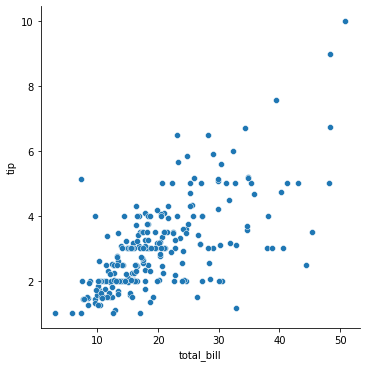

In [25]:
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", data=tips);

In [26]:
pp(type(tips))

<class 'pandas.core.frame.DataFrame'>


In [27]:
pip install pymongo

You should consider upgrading via the '/Users/jkanclerz/.venv/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [28]:
import pandas as pd
from pymongo import MongoClient

In [29]:
client = MongoClient('192.168.56.4', 27017)

In [30]:
db = client.datascience

In [31]:
data = list(db.movies.aggregate([
    {"$match": {"imdb.rating": {"$exists": "1", "$gte": 0, "$lte": 10}}},
    {"$project": {'rating': '$imdb.rating'}},
    {"$group": {"_id": "$rating", "count": {"$sum": 1}}},
    {"$sort": {"_id": 1}}
]))

In [32]:
df = pd.DataFrame(data)
df = df.rename(columns={"_id": "rating"})

In [33]:
df

,rating,count
0,1.2,1
1,1.4,1
2,1.7,1
3,1.8,1
4,1.9,2
...,...,...
72,8.9,1
73,9.0,7
74,9.2,1
75,9.5,1


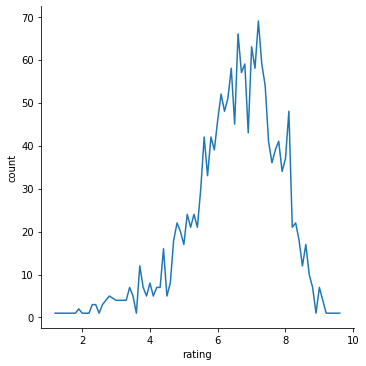

In [34]:
sns.relplot(x="rating", y="count", data=df,  kind="line");

#avarage user rating, runtime

In [35]:
data = list(db.movies.aggregate([
    {
        "$match": 
         {
            "imdb.rating": {"$exists": "1", "$gte": 0, "$lte": 10},
            "runtime": {"$exists": "1"}
        },
    },
    {"$project": {'rating': '$imdb.rating', "runtime": "$runtime"}},
    {"$sort": {"_id": 1}}
]))

df = pd.DataFrame(data)



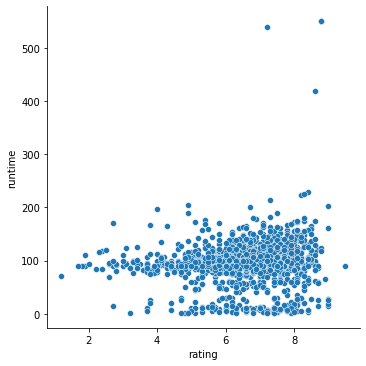

In [36]:
sns.relplot(x="rating", y="runtime", data=df);

Avg rating to votes count

In [37]:
data = list(db.movies.aggregate([
    {"$match": {
        "imdb.rating": {"$exists": "1", "$gte": 0, "$lte": 10},
        "year": {"$gte": 2000}
    }},
    {"$project": {'rating': '$imdb.rating', "year": "$year"}},
    {"$group": {
        "_id": {
            "year": "$year",
            "rating": "$rating"
        },
        "count": {"$sum": 1}}
    },
    {"$project": {
        "rating": "$_id.rating",
        "year": "$_id.year",
        "count": "$count"
    }},
    {"$sort": {"rating": -1}}
]))

In [38]:
pp(list(data))

[{'_id': {'rating': 9.6, 'year': 2005},
  'count': 1,
  'rating': 9.6,
  'year': 2005},
 {'_id': {'rating': 9.5, 'year': 2005},
  'count': 1,
  'rating': 9.5,
  'year': 2005},
 {'_id': {'rating': 9.2, 'year': 2000},
  'count': 1,
  'rating': 9.2,
  'year': 2000},
 {'_id': {'rating': 9, 'year': 2010}, 'count': 2, 'rating': 9, 'year': 2010},
 {'_id': {'rating': 9, 'year': 2014}, 'count': 1, 'rating': 9, 'year': 2014},
 {'_id': {'rating': 9, 'year': 2006}, 'count': 1, 'rating': 9, 'year': 2006},
 {'_id': {'rating': 9, 'year': 2011}, 'count': 1, 'rating': 9, 'year': 2011},
 {'_id': {'rating': 9, 'year': 2007}, 'count': 1, 'rating': 9, 'year': 2007},
 {'_id': {'rating': 8.8, 'year': 2005},
  'count': 1,
  'rating': 8.8,
  'year': 2005},
 {'_id': {'rating': 8.8, 'year': 2002},
  'count': 3,
  'rating': 8.8,
  'year': 2002},
 {'_id': {'rating': 8.8, 'year': 2011},
  'count': 1,
  'rating': 8.8,
  'year': 2011},
 {'_id': {'rating': 8.7, 'year': 2004},
  'count': 1,
  'rating': 8.7,
  'year': 2

  'count': 4,
  'rating': 6.7,
  'year': 2002},
 {'_id': {'rating': 6.7, 'year': 2010},
  'count': 3,
  'rating': 6.7,
  'year': 2010},
 {'_id': {'rating': 6.7, 'year': 2014},
  'count': 1,
  'rating': 6.7,
  'year': 2014},
 {'_id': {'rating': 6.6, 'year': 2000},
  'count': 2,
  'rating': 6.6,
  'year': 2000},
 {'_id': {'rating': 6.6, 'year': 2014},
  'count': 1,
  'rating': 6.6,
  'year': 2014},
 {'_id': {'rating': 6.6, 'year': 2012},
  'count': 3,
  'rating': 6.6,
  'year': 2012},
 {'_id': {'rating': 6.6, 'year': 2007},
  'count': 3,
  'rating': 6.6,
  'year': 2007},
 {'_id': {'rating': 6.6, 'year': 2015},
  'count': 3,
  'rating': 6.6,
  'year': 2015},
 {'_id': {'rating': 6.6, 'year': 2002},
  'count': 2,
  'rating': 6.6,
  'year': 2002},
 {'_id': {'rating': 6.6, 'year': 2010},
  'count': 5,
  'rating': 6.6,
  'year': 2010},
 {'_id': {'rating': 6.6, 'year': 2003},
  'count': 1,
  'rating': 6.6,
  'year': 2003},
 {'_id': {'rating': 6.6, 'year': 2005},
  'count': 2,
  'rating': 6.6,
 

 {'_id': {'rating': 5.4, 'year': 2012},
  'count': 1,
  'rating': 5.4,
  'year': 2012},
 {'_id': {'rating': 5.4, 'year': 2002},
  'count': 1,
  'rating': 5.4,
  'year': 2002},
 {'_id': {'rating': 5.4, 'year': 2010},
  'count': 1,
  'rating': 5.4,
  'year': 2010},
 {'_id': {'rating': 5.4, 'year': 2001},
  'count': 2,
  'rating': 5.4,
  'year': 2001},
 {'_id': {'rating': 5.4, 'year': 2006},
  'count': 2,
  'rating': 5.4,
  'year': 2006},
 {'_id': {'rating': 5.4, 'year': 2013},
  'count': 1,
  'rating': 5.4,
  'year': 2013},
 {'_id': {'rating': 5.4, 'year': 2008},
  'count': 1,
  'rating': 5.4,
  'year': 2008},
 {'_id': {'rating': 5.3, 'year': 2005},
  'count': 1,
  'rating': 5.3,
  'year': 2005},
 {'_id': {'rating': 5.3, 'year': 2008},
  'count': 2,
  'rating': 5.3,
  'year': 2008},
 {'_id': {'rating': 5.3, 'year': 2013},
  'count': 2,
  'rating': 5.3,
  'year': 2013},
 {'_id': {'rating': 5.3, 'year': 2009},
  'count': 1,
  'rating': 5.3,
  'year': 2009},
 {'_id': {'rating': 5.3, 'year':

In [39]:
df = pd.DataFrame(data)
df = df[['count', 'rating', 'year']]

In [40]:
df['year'] = df['year'].apply(int)
counts = df.pivot('rating', 'year', 'count')

In [41]:
counts

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
rating,,,,,,,,,,,,,,,,
1.7,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.9,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2.3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2.4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8.8,NaN,NaN,3.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
9.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,2.0,1.0,NaN,NaN,1.0,NaN
9.2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='year', ylabel='rating'>

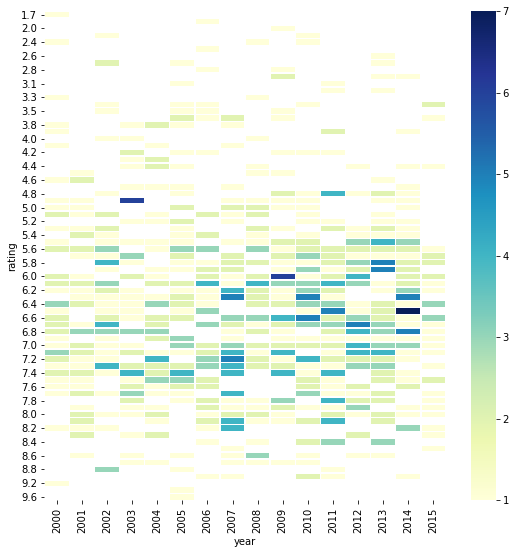

In [42]:
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(counts, linewidths=0.5, ax=ax, cmap="YlGnBu")

In [43]:
data = list(db.movies.aggregate([
    {"$match": {
        "imdb.rating": {"$exists": "1", "$gte": 0, "$lte": 10},
        "year": {"$exists": "1"},
        "awards.wins": {"$exists": "1"},
        "awards.nominations": {"$exists": "1"},
        "actors": {"$exists": "1"},
    }},
    {"$project": {
        'rating': '$imdb.rating',
        "year": "$year",
        "wins": "$awards.wins",
        "nominations": "$awards.nominations",
        "actors_count": {"$size": "$actors"},
        "genre": {"$arrayElemAt": ["$genres", 0]}
    }}
]))

In [44]:
df = pd.DataFrame(data)

In [45]:
df

,_id,rating,year,wins,nominations,actors_count,genre
0,569190cf24de1e0ce2dfcd74,1.9,2006.0,0.0,0.0,4,Action
1,569190cf24de1e0ce2dfcd75,3.3,2000.0,0.0,0.0,4,Comedy
2,569190cf24de1e0ce2dfcd76,4.5,2008.0,0.0,1.0,4,Animation
3,569190d024de1e0ce2dfcd77,7.4,2011.0,22.0,58.0,4,Animation
4,569190d024de1e0ce2dfcd78,7.2,1988.0,6.0,9.0,4,Adventure
...,...,...,...,...,...,...,...
1706,5692a56624de1e0ce2dfdcfe,5.3,1930.0,0.0,0.0,2,Short
1707,5692a56924de1e0ce2dfdcff,5.7,2003.0,0.0,0.0,4,Thriller
1708,5692a56a24de1e0ce2dfdd01,5.5,2009.0,0.0,0.0,4,Short
1709,5692a56c24de1e0ce2dfdd04,7.5,1990.0,0.0,0.0,1,Documentary


In [46]:
df = df[['actors_count','nominations', 'rating', 'wins', 'year', "genre"]]

In [47]:
df

,actors_count,nominations,rating,wins,year,genre
0,4,0.0,1.9,0.0,2006.0,Action
1,4,0.0,3.3,0.0,2000.0,Comedy
2,4,1.0,4.5,0.0,2008.0,Animation
3,4,58.0,7.4,22.0,2011.0,Animation
4,4,9.0,7.2,6.0,1988.0,Adventure
...,...,...,...,...,...,...
1706,2,0.0,5.3,0.0,1930.0,Short
1707,4,0.0,5.7,0.0,2003.0,Thriller
1708,4,0.0,5.5,0.0,2009.0,Short
1709,1,0.0,7.5,0.0,1990.0,Documentary


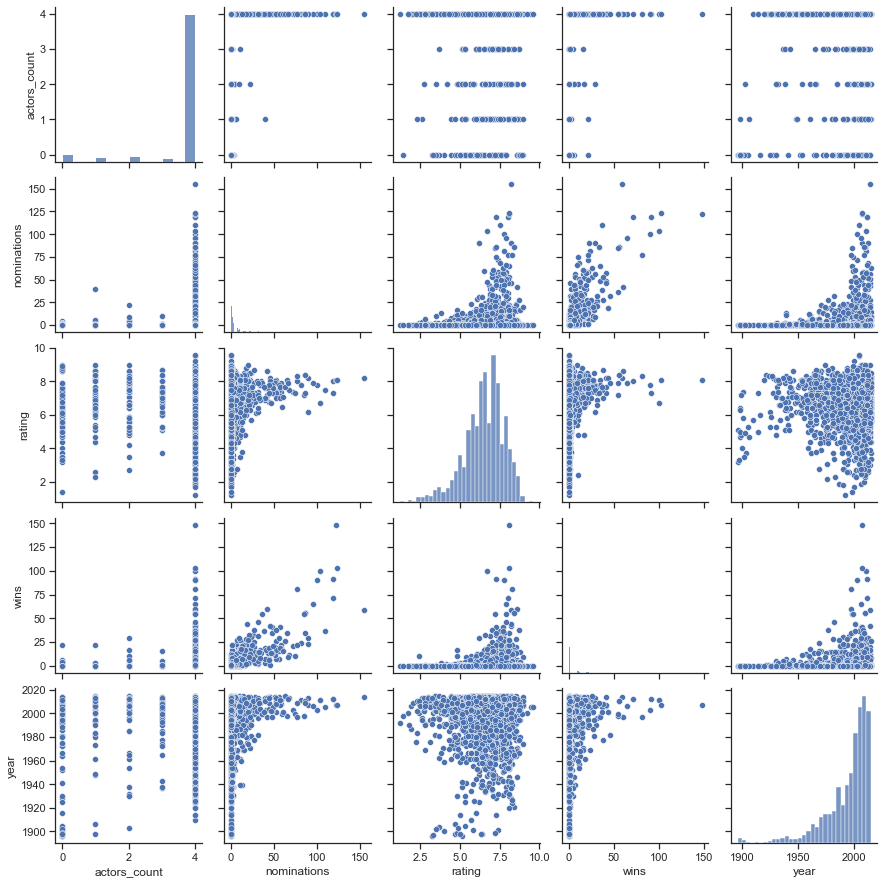

In [52]:
sns.set(style="ticks")
g = sns.pairplot(df)